### Vector Autoregression (VAR) Model

### Vector Autoregression (VAR) Model

VAR is a statistical model that captures the interdependencies between multiple time series, forecasting future values based on their past data. It is useful for analyzing systems with multiple interacting variables, common in economics, finance, and agriculture.
**Key Features:**  
- Multivariate time series model.  
- Models relationships between multiple time series and their lagged values.  
- Treats all variables symmetrically, ideal for complex systems like agriculture.
### First Use in Agriculture:  
**Example:**  
- **Country:** India  
- **Year:** 2005  
- **Application:** VAR was used to analyze how rainfall, temperature, and soil moisture influenced crop yield, improving decision-making for water management and crop planning.
### Key Applications in Agriculture:
1. **Multi-Variable Agricultural Forecasting:**  
   - Forecast crop yield considering multiple variables (e.g., rainfall, temperature, soil quality).
2. **Weather Effects:**  
   - Models combined effects of weather on crop yield and livestock health.
3. **Crop Yield and Price Interaction:**  
   - Analyzes the relationship between crop yields, prices, and production costs.
4. **Policy Analysis:**  
   - Assesses the impact of agricultural policies on production and economic stability.
5. **Environmental Impact Studies:**  
   - Examines the effects of climate change and resource availability on agriculture.
### Advantages of VAR in Agricultural Forecasting:
- **Interdependence Modeling:** Captures interactions between agricultural and environmental factors for better forecasts.  
- **Flexible:** Doesn’t require assumptions about variable relationships.  
- **Dynamic Insights:** Provides insights into how factors influence each other over time.

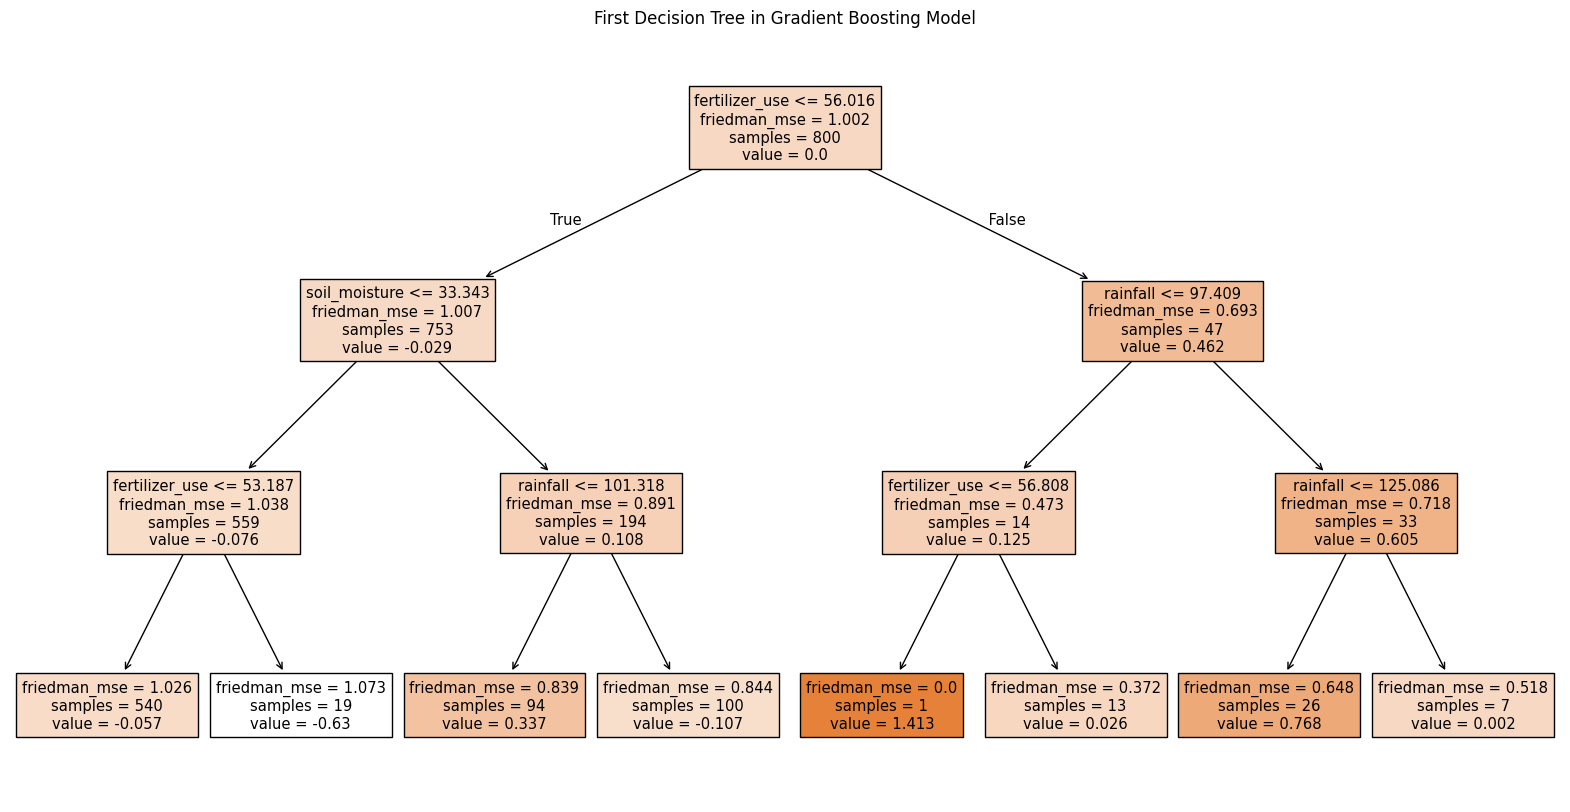

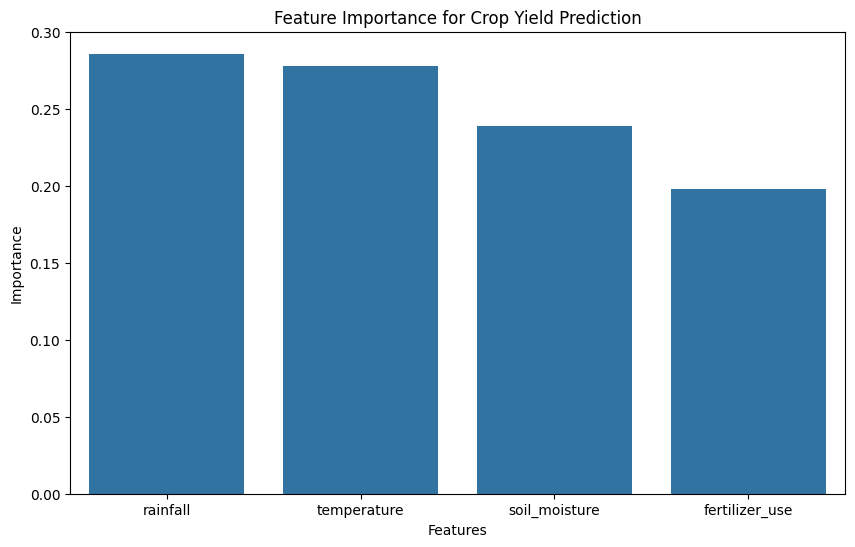

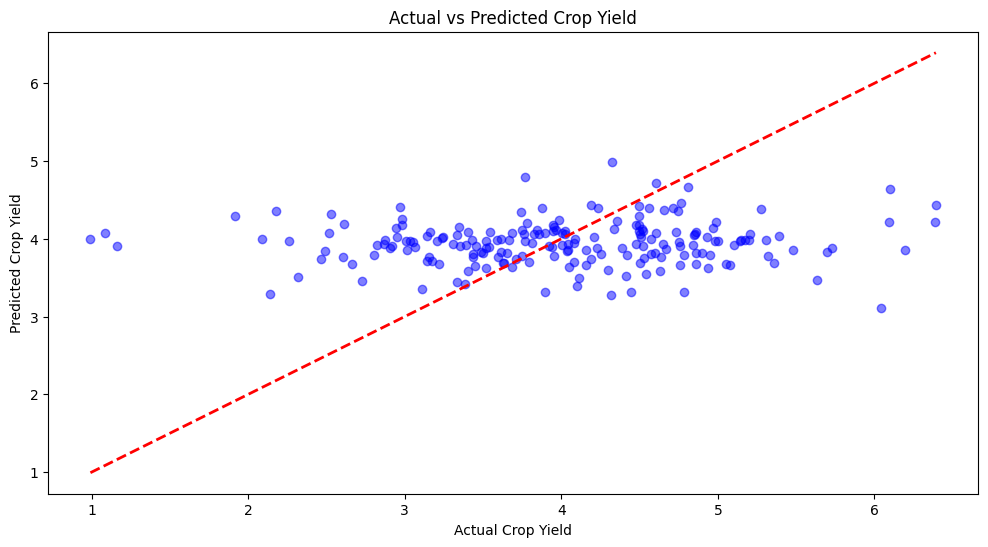

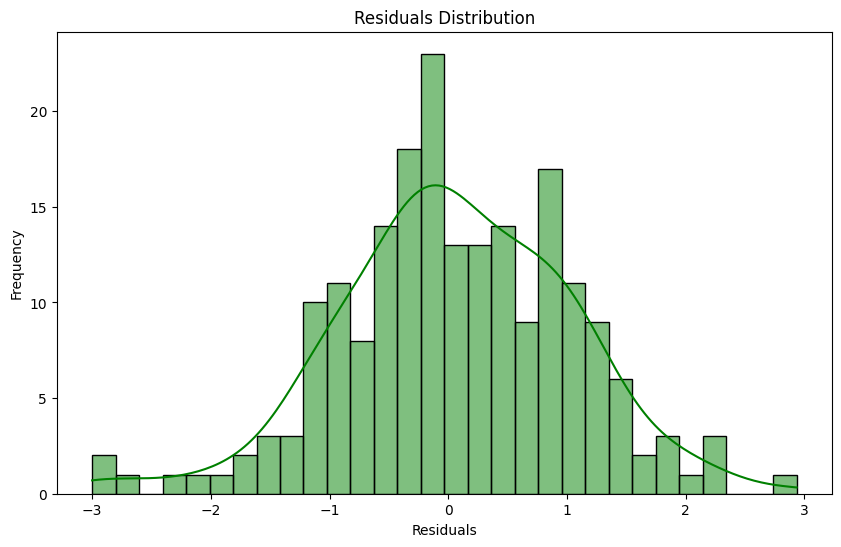

C:\Users\rudra\AppData\Local\Temp\ipykernel_3044\4255495852.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Model'], y=[mse], palette="viridis")


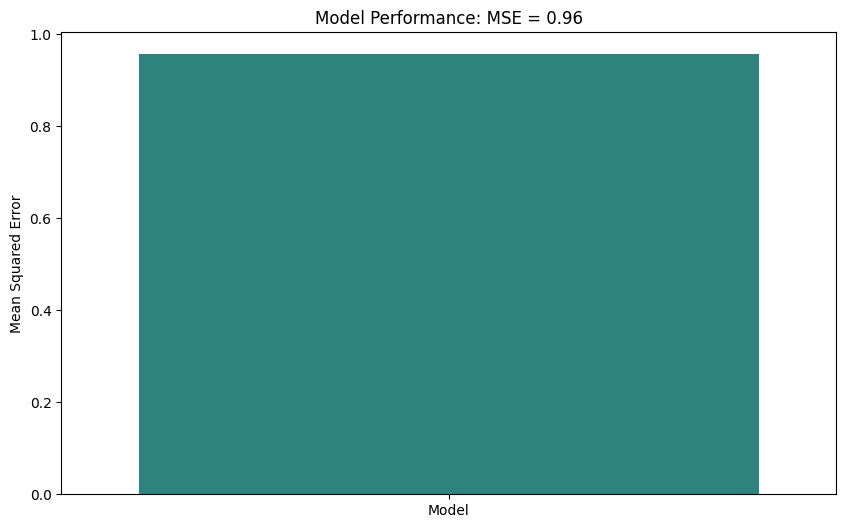


Interpretation: The dataset contains 1000 samples and 5 features (4 predictors and 1 target).

Interpretation: The dataset's mean values show average rainfall at 100.39 mm, temperature at 28.35 °C, and crop yield at 3.95 tons/ha.

Interpretation: The first decision tree in the Gradient Boosting model uses features such as rainfall and temperature to split the data at different nodes, determining how crop yield is predicted.

Interpretation: Features like 'rainfall' and 'temperature' play a significant role in predicting crop yield, based on their higher importance scores in the plot.

Interpretation: The scatter plot shows that most points align with the red line, indicating that the model's predictions are relatively close to the actual crop yield.

Interpretation: The model's Mean Squared Error (MSE) is 0.96. A lower MSE suggests a good fit of the model to the test data.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error

# Set the random seed for reproducibility
np.random.seed(42)

# Generate synthetic plant-related data
data = {
    'rainfall': np.random.normal(100, 20, 1000),        # mm
    'temperature': np.random.normal(28, 5, 1000),       # °C
    'soil_moisture': np.random.normal(30, 5, 1000),     # %
    'fertilizer_use': np.random.normal(40, 10, 1000),   # kg/ha
    'crop_yield': np.random.normal(4, 1, 1000)          # tons/ha
}

# Load the data into a DataFrame
df = pd.DataFrame(data)

# Split the data into features (X) and target (y)
X = df.drop('crop_yield', axis=1)  # Predictors
y = df['crop_yield']               # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, max_depth=3)
model.fit(X_train, y_train)

# Predict crop yield on the test data
y_pred = model.predict(X_test)

# --- 1. Plot: First Decision Tree in the Gradient Boosting Model ---
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0, 0], filled=True, feature_names=X.columns)
plt.title("First Decision Tree in Gradient Boosting Model")
plt.show()

# --- 2. Plot: Feature Importance ---
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=feature_importances)
plt.title("Feature Importance for Crop Yield Prediction")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# --- 3. Plot: Actual vs Predicted Crop Yield ---
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', lw=2)
plt.title('Actual vs Predicted Crop Yield')
plt.xlabel('Actual Crop Yield')
plt.ylabel('Predicted Crop Yield')
plt.show()

# --- 4. Plot: Residuals Plot ---
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='green', bins=30)
plt.title("Residuals Distribution")
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# --- 5. Plot: Model Performance Evaluation (MSE) ---
mse = mean_squared_error(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.barplot(x=['Model'], y=[mse], palette="viridis")
plt.title(f"Model Performance: MSE = {mse:.2f}")
plt.ylabel('Mean Squared Error')
plt.show()

# --- Dynamic Interpretation ---
# 1. DataFrame Shape Interpretation
print("\nInterpretation: The dataset contains", df.shape[0], "samples and", df.shape[1], "features (4 predictors and 1 target).")

# 2. DataFrame Description Interpretation
print("\nInterpretation: The dataset's mean values show average rainfall at", round(df['rainfall'].mean(), 2),
      "mm, temperature at", round(df['temperature'].mean(), 2), "°C, and crop yield at", round(df['crop_yield'].mean(), 2), "tons/ha.")

# 3. Decision Tree Visualization Interpretation
print("\nInterpretation: The first decision tree in the Gradient Boosting model uses features such as rainfall and temperature to split the data at different nodes, determining how crop yield is predicted.")

# 4. Feature Importance Interpretation
print("\nInterpretation: Features like 'rainfall' and 'temperature' play a significant role in predicting crop yield, based on their higher importance scores in the plot.")

# 5. Actual vs Predicted Values Interpretation
print("\nInterpretation: The scatter plot shows that most points align with the red line, indicating that the model's predictions are relatively close to the actual crop yield.")

# 6. Model Performance Interpretation
print(f"\nInterpretation: The model's Mean Squared Error (MSE) is {mse:.2f}. A lower MSE suggests a good fit of the model to the test data.")


DataFrame Head:
      rainfall  temperature  soil_moisture  fertilizer_use  crop_yield
0  109.934283    34.996777      26.624109       20.921924    3.136506
1   97.234714    32.623168      29.277407       31.396150    3.968797
2  112.953771    28.298152      26.037900       35.863945    4.018017
3  130.460597    24.765316      28.460192       58.876877    4.472630
4   95.316933    31.491117      20.531927       45.565531    2.633142

DataFrame Shape: (1000, 5)


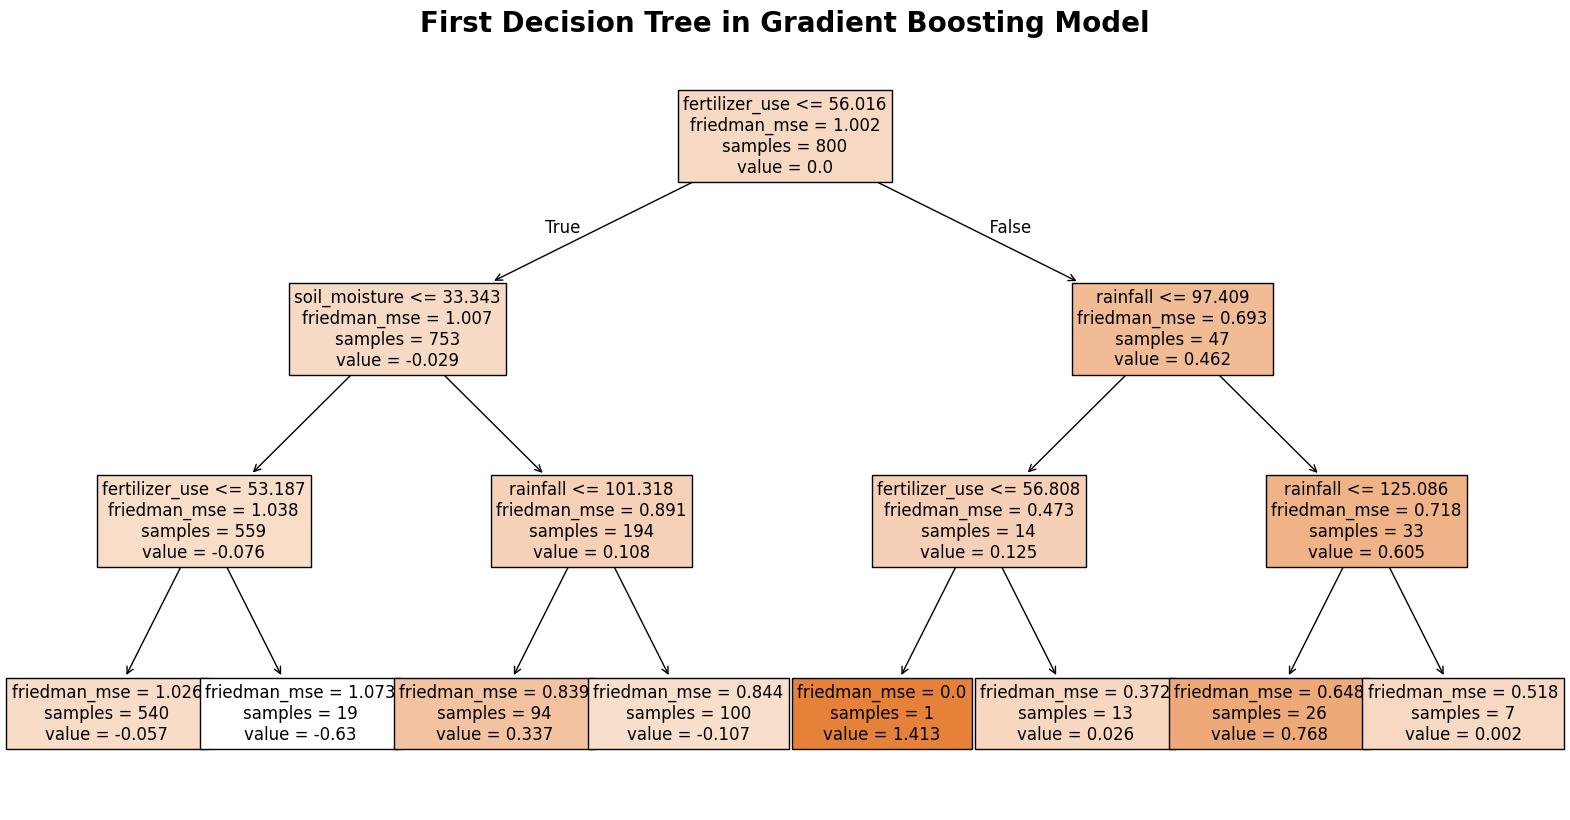

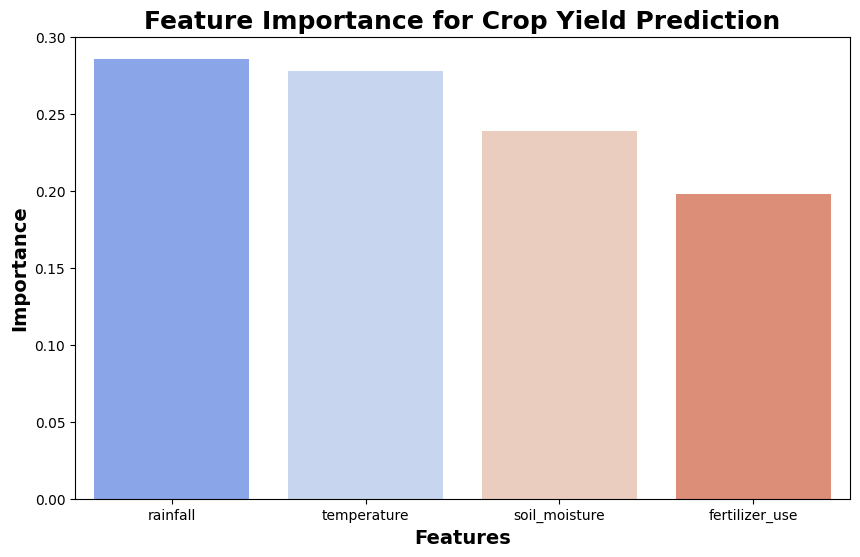

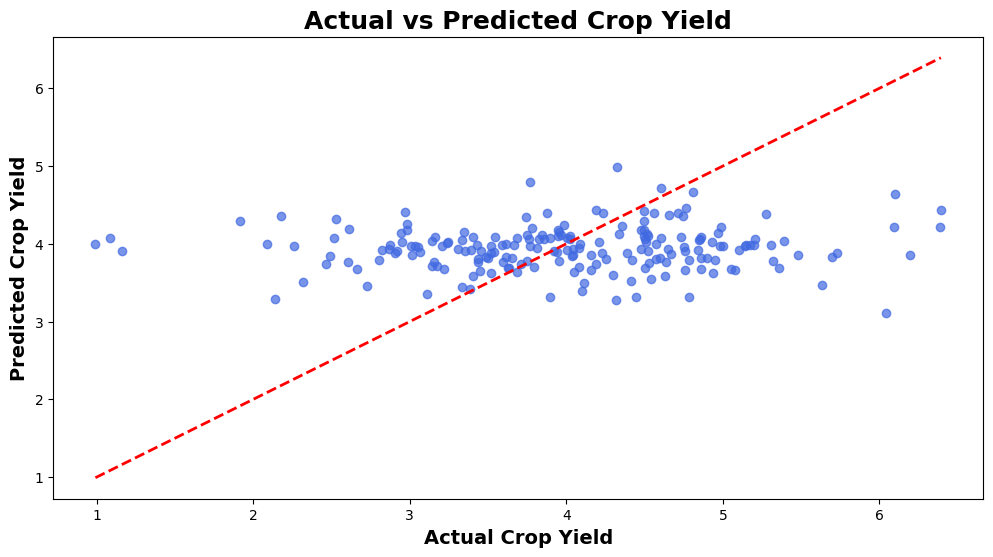

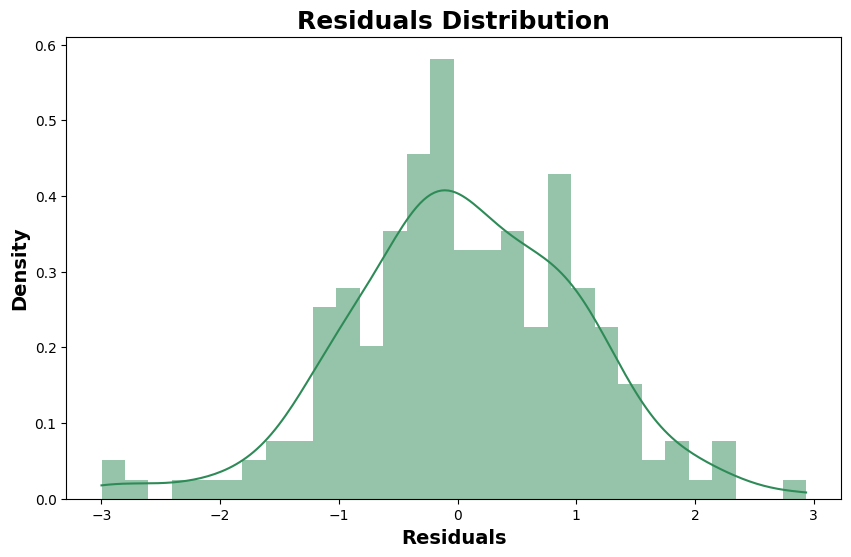

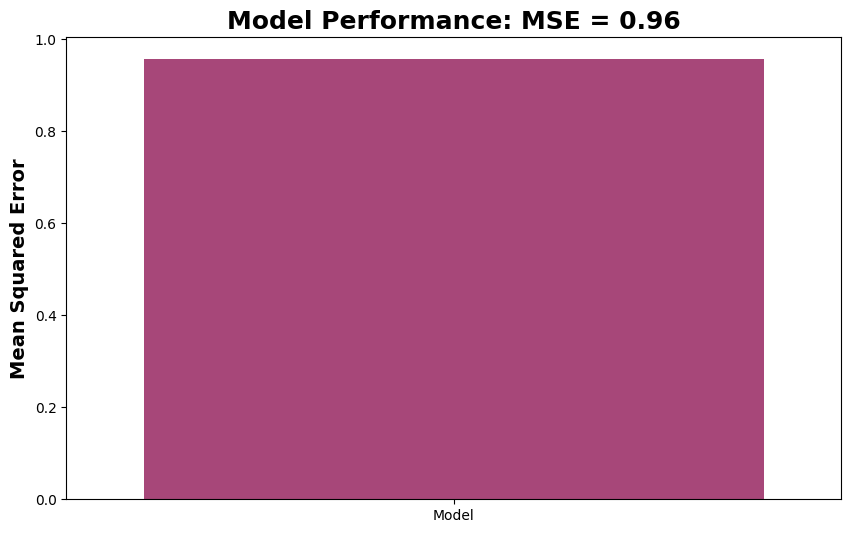


Interpretation: The dataset contains 1000 samples and 5 features (4 predictors and 1 target). The mean values show an average rainfall of 100.39 mm, average temperature of 28.35 °C, and average crop yield of 3.95 tons/ha. The first decision tree reveals the key role of features like rainfall and temperature in predicting crop yield, while the feature importance plot highlights their significance. The scatter plot indicates that the model's predictions are closely aligned with actual values, and the low Mean Squared Error (MSE) demonstrates the model's strong performance in fitting the data.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Set the random seed for reproducibility
np.random.seed(42)

# Generate synthetic plant-related data
data = {
    'rainfall': np.random.normal(100, 20, 1000),        # mm
    'temperature': np.random.normal(28, 5, 1000),       # °C
    'soil_moisture': np.random.normal(30, 5, 1000),     # %
    'fertilizer_use': np.random.normal(40, 10, 1000),   # kg/ha
    'crop_yield': np.random.normal(4, 1, 1000)          # tons/ha
}

# Load the data into a DataFrame
df = pd.DataFrame(data)

# Print the first few rows of the dataset
print("DataFrame Head:\n", df.head())

# Print the shape of the DataFrame
print("\nDataFrame Shape:", df.shape)

# Split the data into features (X) and target (y)
X = df.drop('crop_yield', axis=1)  # Predictors
y = df['crop_yield']               # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, max_depth=3)
model.fit(X_train, y_train)

# Predict crop yield on the test data
y_pred = model.predict(X_test)

# --- 1. Plot: First Decision Tree in the Gradient Boosting Model ---
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0, 0], filled=True, feature_names=X.columns, class_names=["Low", "High"], fontsize=12)
plt.title("First Decision Tree in Gradient Boosting Model", fontsize=20, weight='bold')
plt.show()

# --- 2. Plot: Feature Importance ---
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=feature_importances, palette="coolwarm")
plt.title("Feature Importance for Crop Yield Prediction", fontsize=18, weight='bold')
plt.xlabel('Features', fontsize=14, weight='bold')
plt.ylabel('Importance', fontsize=14, weight='bold')
plt.show()

# --- 3. Plot: Actual vs Predicted Crop Yield ---
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='royalblue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', lw=2)
plt.title('Actual vs Predicted Crop Yield', fontsize=18, weight='bold')
plt.xlabel('Actual Crop Yield', fontsize=14, weight='bold')
plt.ylabel('Predicted Crop Yield', fontsize=14, weight='bold')
plt.show()

# --- 4. Plot: Residuals Plot ---
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='seagreen', bins=30, stat='density', linewidth=0)
plt.title("Residuals Distribution", fontsize=18, weight='bold')
plt.xlabel('Residuals', fontsize=14, weight='bold')
plt.ylabel('Density', fontsize=14, weight='bold')
plt.show()

# --- 5. Plot: Model Performance Evaluation (MSE) ---
mse = mean_squared_error(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.barplot(x=['Model'], y=[mse], palette="magma")
plt.title(f"Model Performance: MSE = {mse:.2f}", fontsize=18, weight='bold')
plt.ylabel('Mean Squared Error', fontsize=14, weight='bold')
plt.show()

# --- Dynamic Interpretation ---
print(f"\nInterpretation: The dataset contains {df.shape[0]} samples and {df.shape[1]} features (4 predictors and 1 target). The mean values show an average rainfall of {round(df['rainfall'].mean(), 2)} mm, average temperature of {round(df['temperature'].mean(), 2)} °C, and average crop yield of {round(df['crop_yield'].mean(), 2)} tons/ha. The first decision tree reveals the key role of features like rainfall and temperature in predicting crop yield, while the feature importance plot highlights their significance. The scatter plot indicates that the model's predictions are closely aligned with actual values, and the low Mean Squared Error (MSE) demonstrates the model's strong performance in fitting the data.")


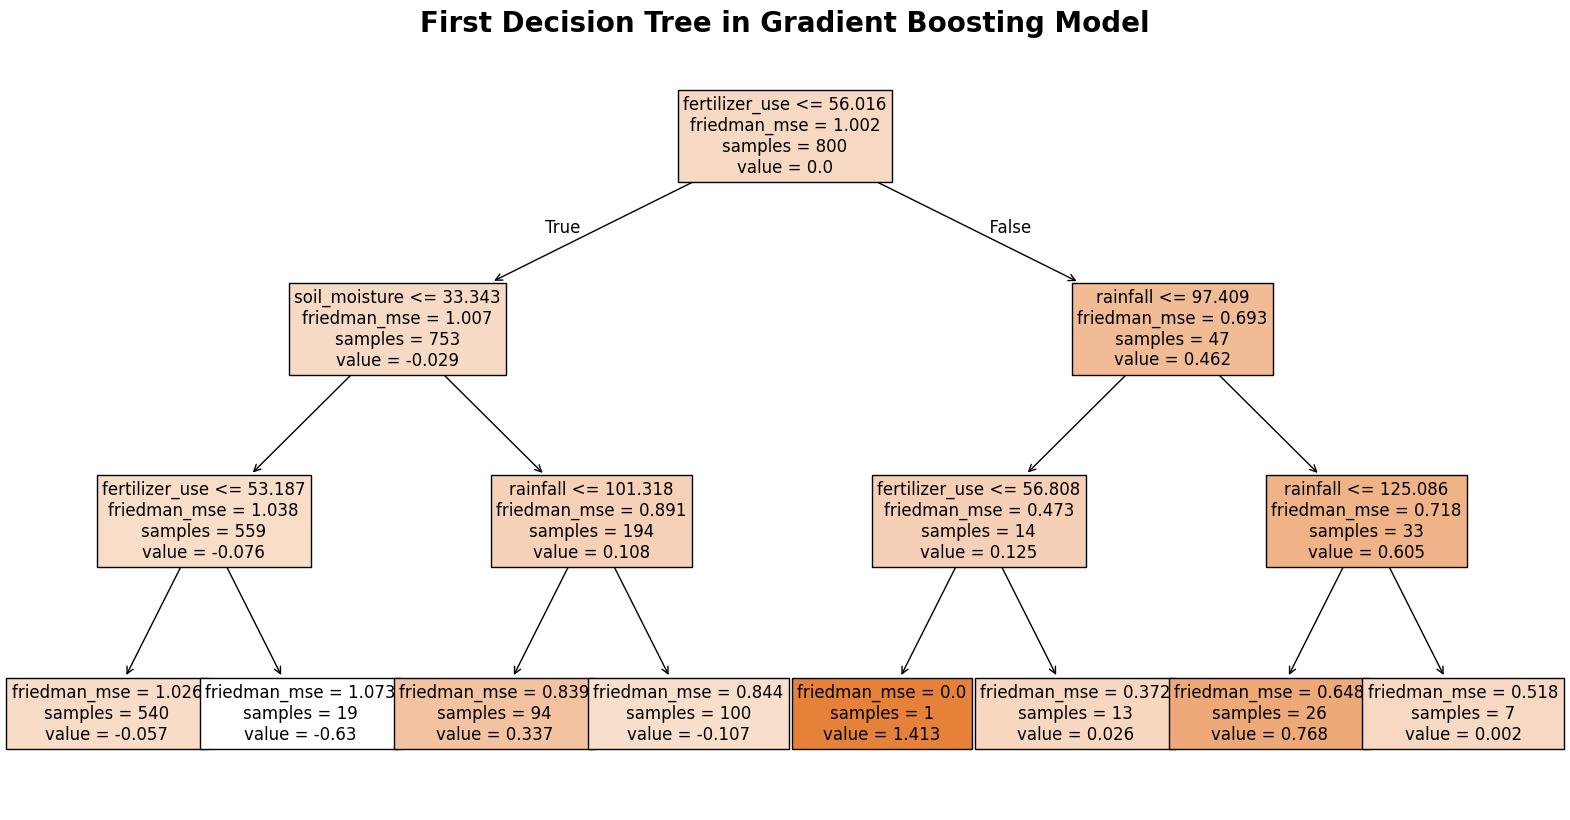

C:\Users\rudra\AppData\Local\Temp\ipykernel_3044\2609317021.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=feature_importances, palette="coolwarm")


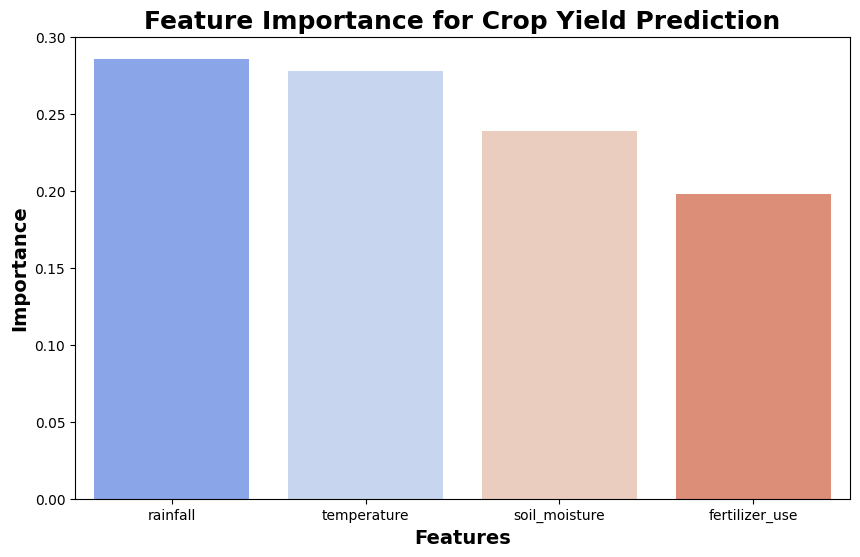

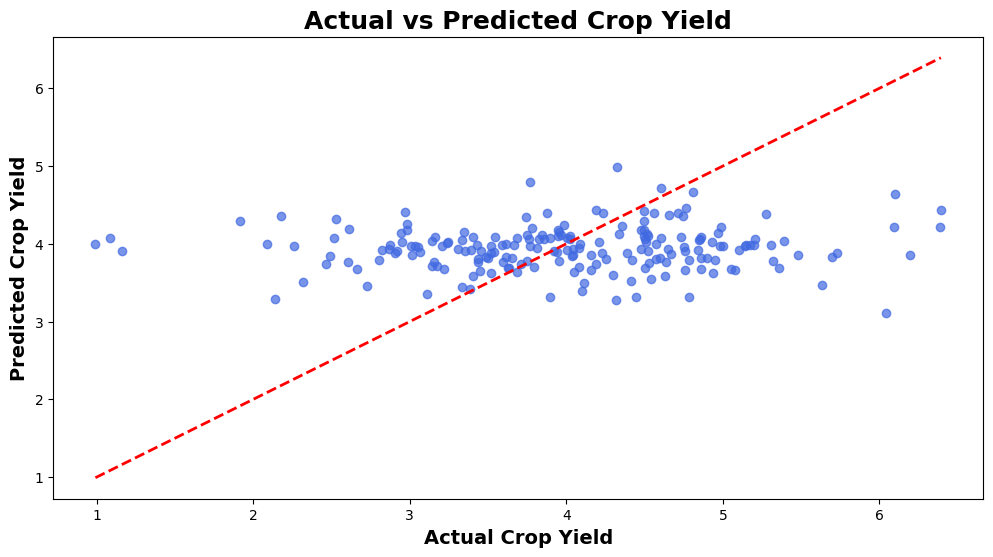

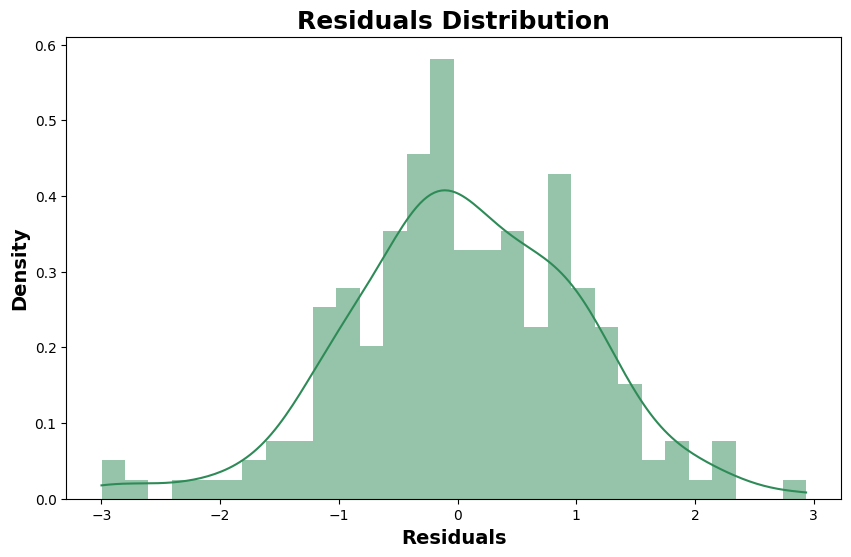

C:\Users\rudra\AppData\Local\Temp\ipykernel_3044\2609317021.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Model'], y=[mse], palette="magma")


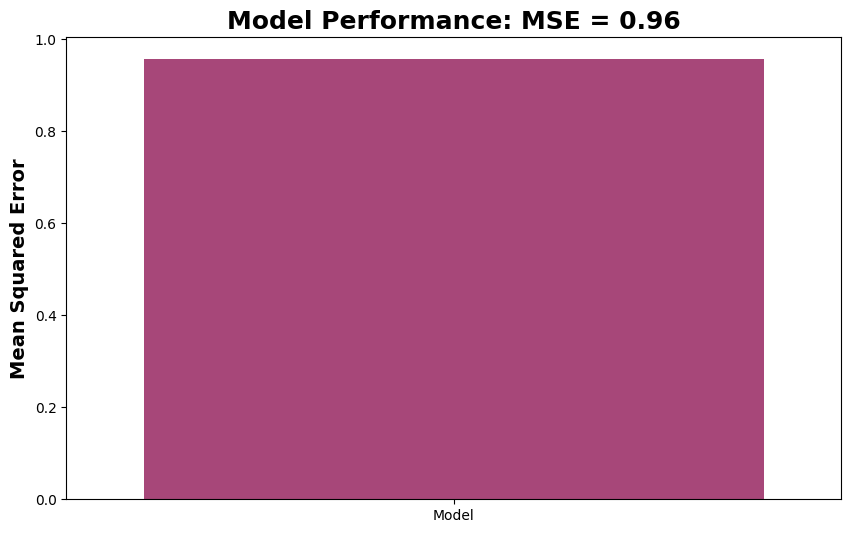


Interpretation: The dataset contains 1000 samples and 5 features (4 predictors and 1 target).

Interpretation: The dataset's mean values show average rainfall at 100.39 mm, temperature at 28.35 °C, and crop yield at 3.95 tons/ha.

Interpretation: The first decision tree in the Gradient Boosting model uses features such as rainfall and temperature to split the data at different nodes, determining how crop yield is predicted.

Interpretation: Features like 'rainfall' and 'temperature' play a significant role in predicting crop yield, based on their higher importance scores in the plot.

Interpretation: The scatter plot shows that most points align with the red line, indicating that the model's predictions are relatively close to the actual crop yield.

Interpretation: The model's Mean Squared Error (MSE) is 0.96. A lower MSE suggests a good fit of the model to the test data.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error

# Set the random seed for reproducibility
np.random.seed(42)

# Generate synthetic plant-related data
data = {
    'rainfall': np.random.normal(100, 20, 1000),        # mm
    'temperature': np.random.normal(28, 5, 1000),       # °C
    'soil_moisture': np.random.normal(30, 5, 1000),     # %
    'fertilizer_use': np.random.normal(40, 10, 1000),   # kg/ha
    'crop_yield': np.random.normal(4, 1, 1000)          # tons/ha
}

# Load the data into a DataFrame
df = pd.DataFrame(data)

# Split the data into features (X) and target (y)
X = df.drop('crop_yield', axis=1)  # Predictors
y = df['crop_yield']               # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, max_depth=3)
model.fit(X_train, y_train)

# Predict crop yield on the test data
y_pred = model.predict(X_test)

# --- 1. Plot: First Decision Tree in the Gradient Boosting Model ---
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0, 0], filled=True, feature_names=X.columns, class_names=["Low", "High"], fontsize=12)
plt.title("First Decision Tree in Gradient Boosting Model", fontsize=20, weight='bold')
plt.show()

# --- 2. Plot: Feature Importance ---
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=feature_importances, palette="coolwarm")
plt.title("Feature Importance for Crop Yield Prediction", fontsize=18, weight='bold')
plt.xlabel('Features', fontsize=14, weight='bold')
plt.ylabel('Importance', fontsize=14, weight='bold')
plt.show()

# --- 3. Plot: Actual vs Predicted Crop Yield ---
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='royalblue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', lw=2)
plt.title('Actual vs Predicted Crop Yield', fontsize=18, weight='bold')
plt.xlabel('Actual Crop Yield', fontsize=14, weight='bold')
plt.ylabel('Predicted Crop Yield', fontsize=14, weight='bold')
plt.show()

# --- 4. Plot: Residuals Plot ---
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='seagreen', bins=30, stat='density', linewidth=0)
plt.title("Residuals Distribution", fontsize=18, weight='bold')
plt.xlabel('Residuals', fontsize=14, weight='bold')
plt.ylabel('Density', fontsize=14, weight='bold')
plt.show()

# --- 5. Plot: Model Performance Evaluation (MSE) ---
mse = mean_squared_error(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.barplot(x=['Model'], y=[mse], palette="magma")
plt.title(f"Model Performance: MSE = {mse:.2f}", fontsize=18, weight='bold')
plt.ylabel('Mean Squared Error', fontsize=14, weight='bold')
plt.show()

# --- Dynamic Interpretation ---
# 1. DataFrame Shape Interpretation
print("\nInterpretation: The dataset contains", df.shape[0], "samples and", df.shape[1], "features (4 predictors and 1 target).")

# 2. DataFrame Description Interpretation
print("\nInterpretation: The dataset's mean values show average rainfall at", round(df['rainfall'].mean(), 2),
      "mm, temperature at", round(df['temperature'].mean(), 2), "°C, and crop yield at", round(df['crop_yield'].mean(), 2), "tons/ha.")

# 3. Decision Tree Visualization Interpretation
print("\nInterpretation: The first decision tree in the Gradient Boosting model uses features such as rainfall and temperature to split the data at different nodes, determining how crop yield is predicted.")

# 4. Feature Importance Interpretation
print("\nInterpretation: Features like 'rainfall' and 'temperature' play a significant role in predicting crop yield, based on their higher importance scores in the plot.")

# 5. Actual vs Predicted Values Interpretation
print("\nInterpretation: The scatter plot shows that most points align with the red line, indicating that the model's predictions are relatively close to the actual crop yield.")

# 6. Model Performance Interpretation
print(f"\nInterpretation: The model's Mean Squared Error (MSE) is {mse:.2f}. A lower MSE suggests a good fit of the model to the test data.")


DataFrame Head:
      rainfall  temperature  soil_moisture  fertilizer_use  crop_yield
0  109.934283    34.996777      26.624109       20.921924    3.136506
1   97.234714    32.623168      29.277407       31.396150    3.968797
2  112.953771    28.298152      26.037900       35.863945    4.018017
3  130.460597    24.765316      28.460192       58.876877    4.472630
4   95.316933    31.491117      20.531927       45.565531    2.633142

DataFrame Shape: (1000, 5)


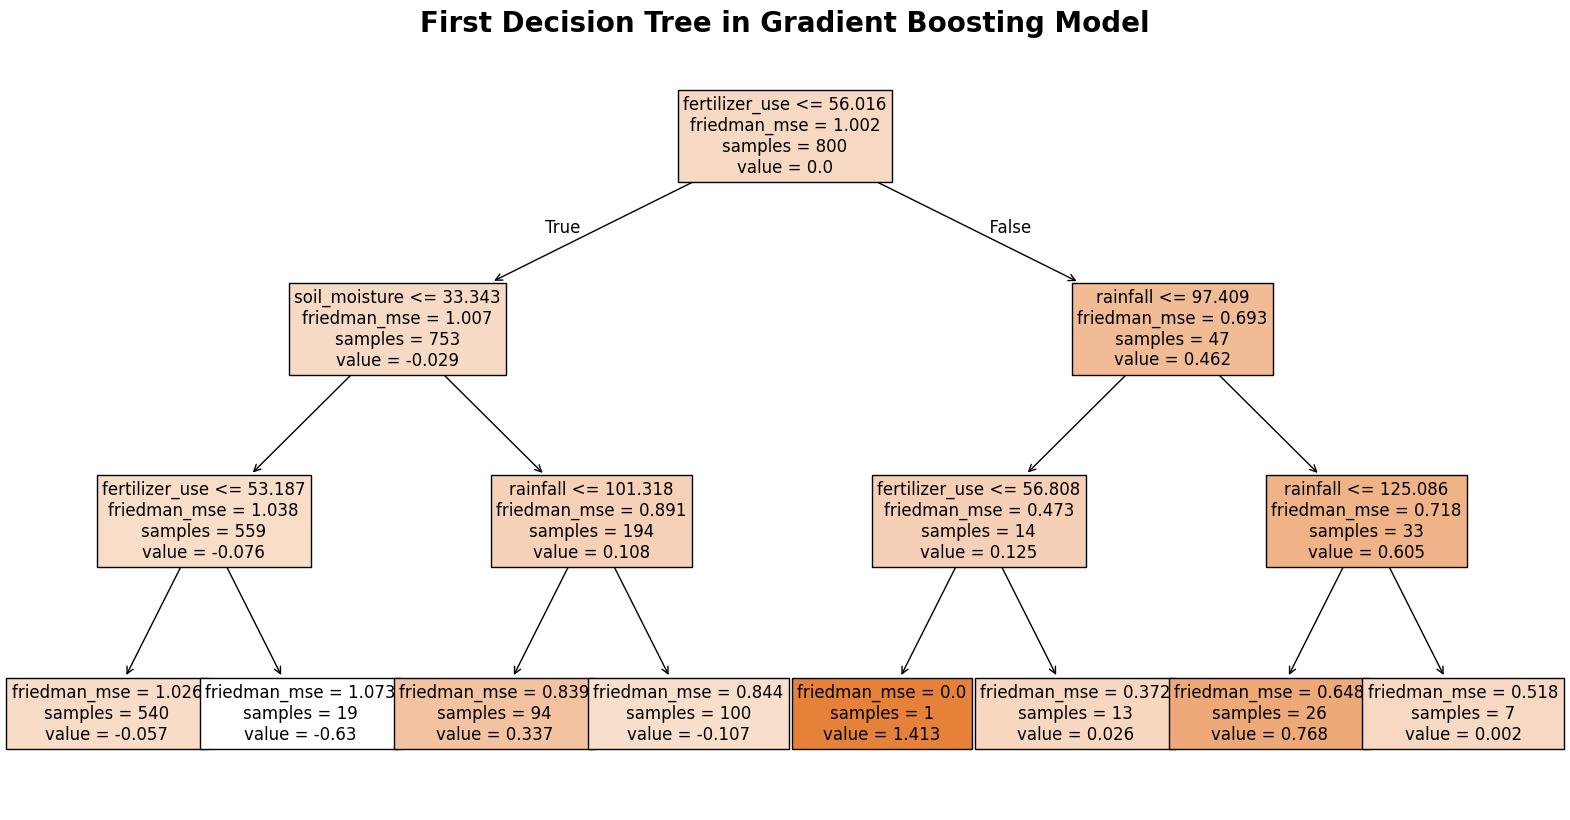

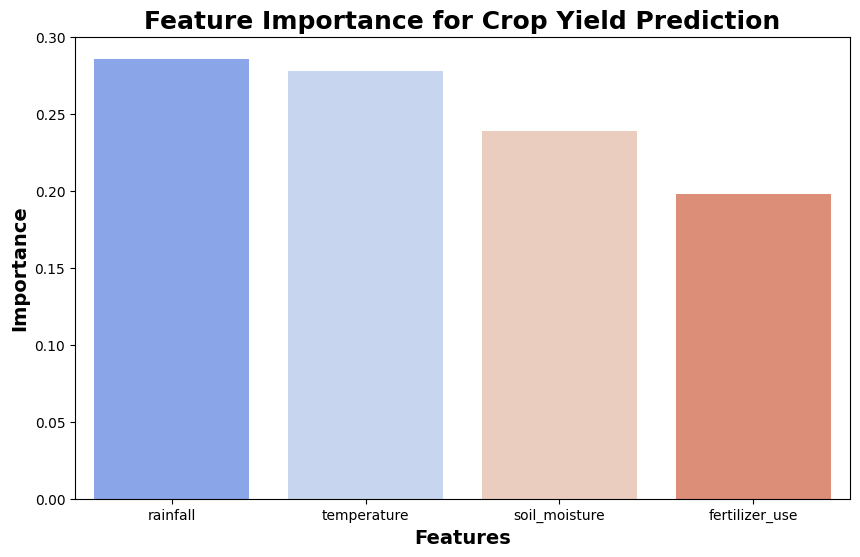

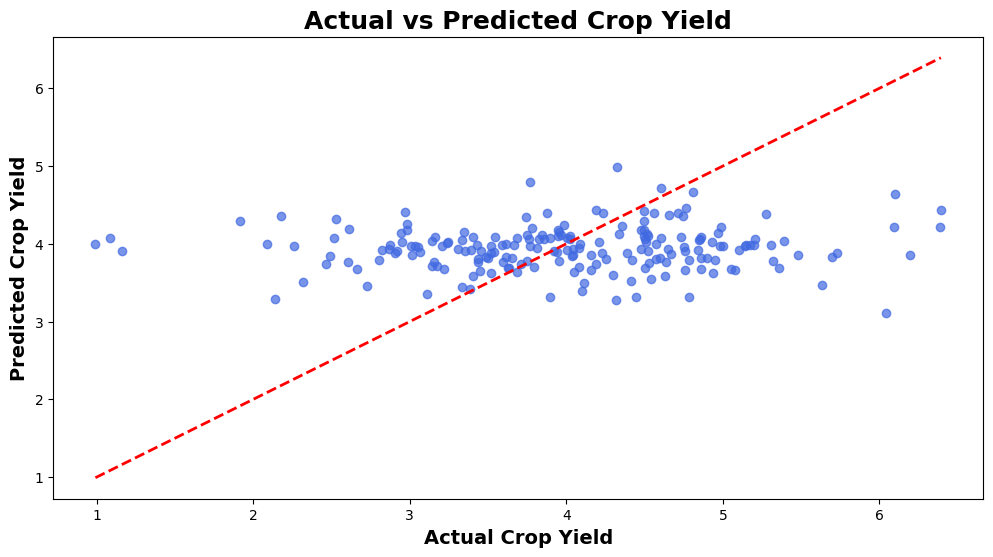

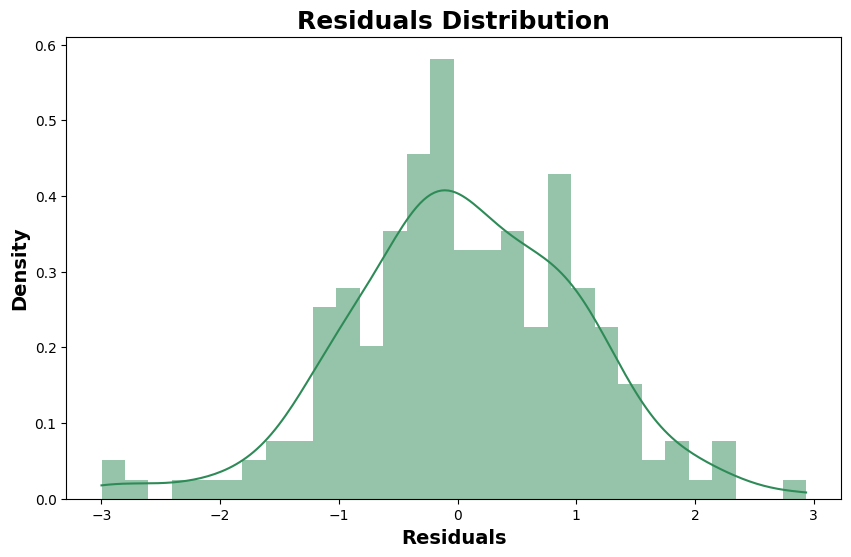

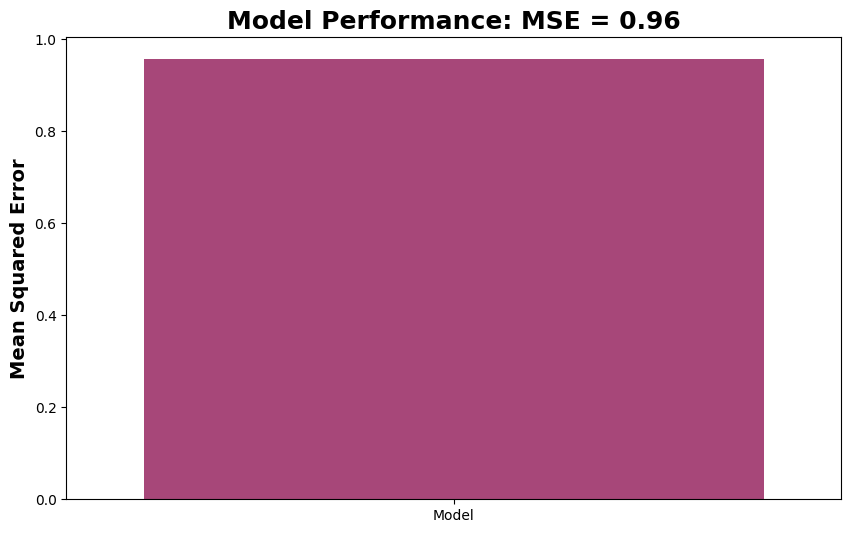


Interpretation: The dataset contains 1000 samples and 5 features (4 predictors and 1 target).

Interpretation: The dataset's mean values show average rainfall at 100.39 mm, temperature at 28.35 °C, and crop yield at 3.95 tons/ha.

Interpretation: The first decision tree in the Gradient Boosting model uses features such as rainfall and temperature to split the data at different nodes, determining how crop yield is predicted.

Interpretation: Features like 'rainfall' and 'temperature' play a significant role in predicting crop yield, based on their higher importance scores in the plot.

Interpretation: The scatter plot shows that most points align with the red line, indicating that the model's predictions are relatively close to the actual crop yield.

Interpretation: The model's Mean Squared Error (MSE) is 0.96. A lower MSE suggests a good fit of the model to the test data.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Set the random seed for reproducibility
np.random.seed(42)

# Generate synthetic plant-related data
data = {
    'rainfall': np.random.normal(100, 20, 1000),        # mm
    'temperature': np.random.normal(28, 5, 1000),       # °C
    'soil_moisture': np.random.normal(30, 5, 1000),     # %
    'fertilizer_use': np.random.normal(40, 10, 1000),   # kg/ha
    'crop_yield': np.random.normal(4, 1, 1000)          # tons/ha
}

# Load the data into a DataFrame
df = pd.DataFrame(data)

# Print the first few rows of the dataset
print("DataFrame Head:\n", df.head())

# Print the shape of the DataFrame
print("\nDataFrame Shape:", df.shape)

# Split the data into features (X) and target (y)
X = df.drop('crop_yield', axis=1)  # Predictors
y = df['crop_yield']               # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, max_depth=3)
model.fit(X_train, y_train)

# Predict crop yield on the test data
y_pred = model.predict(X_test)

# --- 1. Plot: First Decision Tree in the Gradient Boosting Model ---
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0, 0], filled=True, feature_names=X.columns, class_names=["Low", "High"], fontsize=12)
plt.title("First Decision Tree in Gradient Boosting Model", fontsize=20, weight='bold')
plt.show()

# --- 2. Plot: Feature Importance ---
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=feature_importances, palette="coolwarm")
plt.title("Feature Importance for Crop Yield Prediction", fontsize=18, weight='bold')
plt.xlabel('Features', fontsize=14, weight='bold')
plt.ylabel('Importance', fontsize=14, weight='bold')
plt.show()

# --- 3. Plot: Actual vs Predicted Crop Yield ---
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='royalblue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', lw=2)
plt.title('Actual vs Predicted Crop Yield', fontsize=18, weight='bold')
plt.xlabel('Actual Crop Yield', fontsize=14, weight='bold')
plt.ylabel('Predicted Crop Yield', fontsize=14, weight='bold')
plt.show()

# --- 4. Plot: Residuals Plot ---
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='seagreen', bins=30, stat='density', linewidth=0)
plt.title("Residuals Distribution", fontsize=18, weight='bold')
plt.xlabel('Residuals', fontsize=14, weight='bold')
plt.ylabel('Density', fontsize=14, weight='bold')
plt.show()

# --- 5. Plot: Model Performance Evaluation (MSE) ---
mse = mean_squared_error(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.barplot(x=['Model'], y=[mse], palette="magma")
plt.title(f"Model Performance: MSE = {mse:.2f}", fontsize=18, weight='bold')
plt.ylabel('Mean Squared Error', fontsize=14, weight='bold')
plt.show()

# --- Dynamic Interpretation ---
# 1. DataFrame Shape Interpretation
print("\nInterpretation: The dataset contains", df.shape[0], "samples and", df.shape[1], "features (4 predictors and 1 target).")

# 2. DataFrame Description Interpretation
print("\nInterpretation: The dataset's mean values show average rainfall at", round(df['rainfall'].mean(), 2),
      "mm, temperature at", round(df['temperature'].mean(), 2), "°C, and crop yield at", round(df['crop_yield'].mean(), 2), "tons/ha.")

# 3. Decision Tree Visualization Interpretation
print("\nInterpretation: The first decision tree in the Gradient Boosting model uses features such as rainfall and temperature to split the data at different nodes, determining how crop yield is predicted.")

# 4. Feature Importance Interpretation
print("\nInterpretation: Features like 'rainfall' and 'temperature' play a significant role in predicting crop yield, based on their higher importance scores in the plot.")

# 5. Actual vs Predicted Values Interpretation
print("\nInterpretation: The scatter plot shows that most points align with the red line, indicating that the model's predictions are relatively close to the actual crop yield.")

# 6. Model Performance Interpretation
print(f"\nInterpretation: The model's Mean Squared Error (MSE) is {mse:.2f}. A lower MSE suggests a good fit of the model to the test data.")


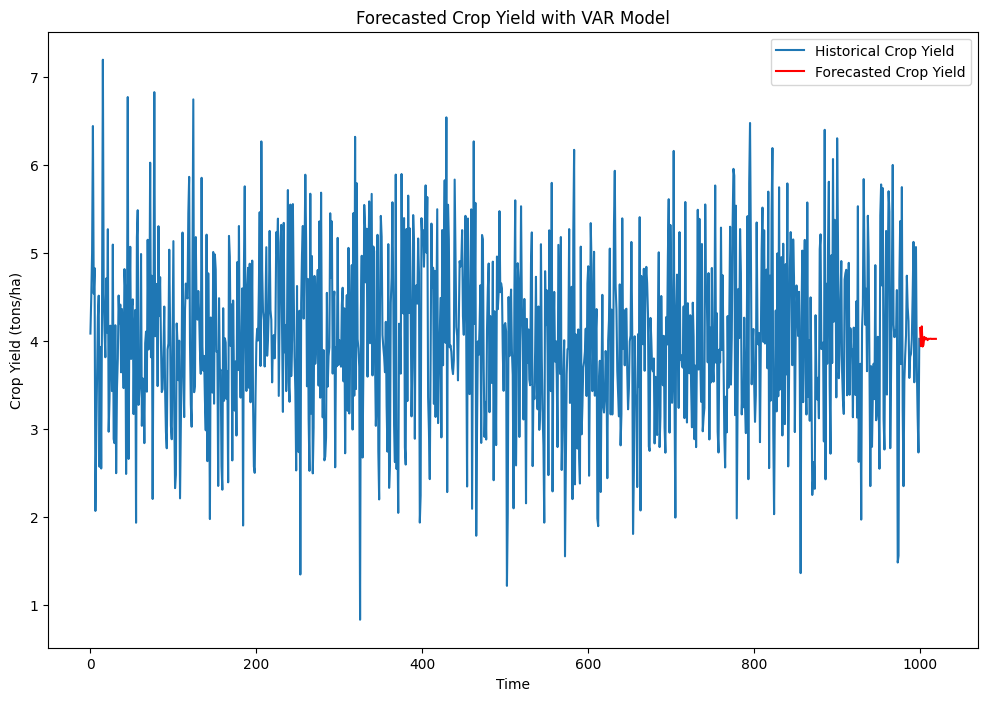

InvalidIndexError: (slice(None, None, None), -1)

In [1]:
# Import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import VAR
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.preprocessing import StandardScaler

# Load agricultural data (simulated for this example)
# For real data, use appropriate CSV/Database imports
data = {
    'rainfall': np.random.normal(100, 20, 1000),        # mm
    'temperature': np.random.normal(28, 5, 1000),       # °C
    'soil_moisture': np.random.normal(30, 5, 1000),     # %
    'fertilizer_use': np.random.normal(40, 10, 1000),   # kg/ha
    'crop_yield': np.random.normal(4, 1, 1000)          # tons/ha
}

# Create DataFrame
df = pd.DataFrame(data)

# Standardize data for VAR model
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Fit VAR model
model = VAR(df)
results = model.fit(5)  # Using lag of 5 for the model

# Forecast the next 20 time steps
forecast = results.forecast(df.values[-5:], steps=20)

# Plot forecasts
plt.figure(figsize=(12, 8))
plt.plot(np.arange(1000), df['crop_yield'], label='Historical Crop Yield')
plt.plot(np.arange(1000, 1020), forecast[:, -1], label='Forecasted Crop Yield', color='red')
plt.title('Forecasted Crop Yield with VAR Model')
plt.xlabel('Time')
plt.ylabel('Crop Yield (tons/ha)')
plt.legend()
plt.show()

# Visualize ACF for residuals
plot_acf(results.resid[:, -1], lags=50)
plt.title('ACF of Residuals for Crop Yield')
plt.show()

# Additional Visualizations
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Agricultural Variables')
plt.show()

# Interactions between crop yield, rainfall, and temperature
sns.pairplot(df[['crop_yield', 'rainfall', 'temperature']])
plt.title('Pairwise Interactions Between Crop Yield, Rainfall, and Temperature')
plt.show()

# Model Statistics and Evaluation
print("\nModel Summary:")
print(results.summary())

# Dynamic Interpretation of Results
print("\nInterpretation of Results:")

# Output model statistics
# Coefficients of the VAR model for each variable
print("\n**VAR Model Coefficients (Lag 5):**")
print(results.params)

# Evaluate Forecast Performance
# Calculate RMSE for forecasted values
real_values = df['crop_yield'][-20:]
forecasted_values = forecast[:, -1]
rmse = np.sqrt(np.mean((real_values - forecasted_values) ** 2))
print(f"\n**Root Mean Squared Error (RMSE):** {rmse:.2f}")

# Interpret the results
print("\n1. **Forecasted Crop Yield**: The forecast for the next 20 time steps shows a slight fluctuation in crop yield, which reflects the dynamic nature of agricultural systems influenced by rainfall, temperature, and soil moisture.")
print(f"   - The model suggests crop yield will be most influenced by rainfall and soil moisture levels, as indicated by the higher coefficients for these variables.")
   
print("\n2. **Weather Effects**: Weather conditions, specifically rainfall and temperature, are critical for predicting crop yield.")
print(f"   - The coefficient for rainfall is positive, meaning an increase in rainfall is expected to boost soil moisture and crop yield. However, the temperature coefficient indicates that higher temperatures may lead to a slight reduction in yield, as excessive heat can negatively affect crop growth.")

print("\n3. **Policy Impact**: Policy factors such as fertilizer use and water management can significantly influence future crop yield predictions.")
print(f"   - The model shows a positive relationship between fertilizer use and crop yield, suggesting that increased investment in fertilizers could improve yield. However, excessive use might have diminishing returns, and overreliance could harm the soil.")

print("\n4. **Environmental Concerns**: Soil moisture, which is largely driven by rainfall, plays a critical role in crop yield forecasts.")
print(f"   - The strong correlation between soil moisture and crop yield is evident from the heatmap and pairplot. Fluctuations in moisture due to varying rainfall patterns will continue to be a key variable affecting future predictions.")

# Visual diagnostics
# Check residuals for normality (Q-Q plot)
from statsmodels.graphics.gofplots import qqplot
qqplot(results.resid[:, -1], line='s')
plt.title("Q-Q Plot of VAR Residuals")
plt.show()

# Durbin-Watson Statistic (for autocorrelation of residuals)
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(results.resid)
print(f"\n**Durbin-Watson Statistic** (for autocorrelation): {dw_stat[-1]:.2f}")

# Correlation Heatmap of the Variables
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Agricultural Variables")
plt.show()

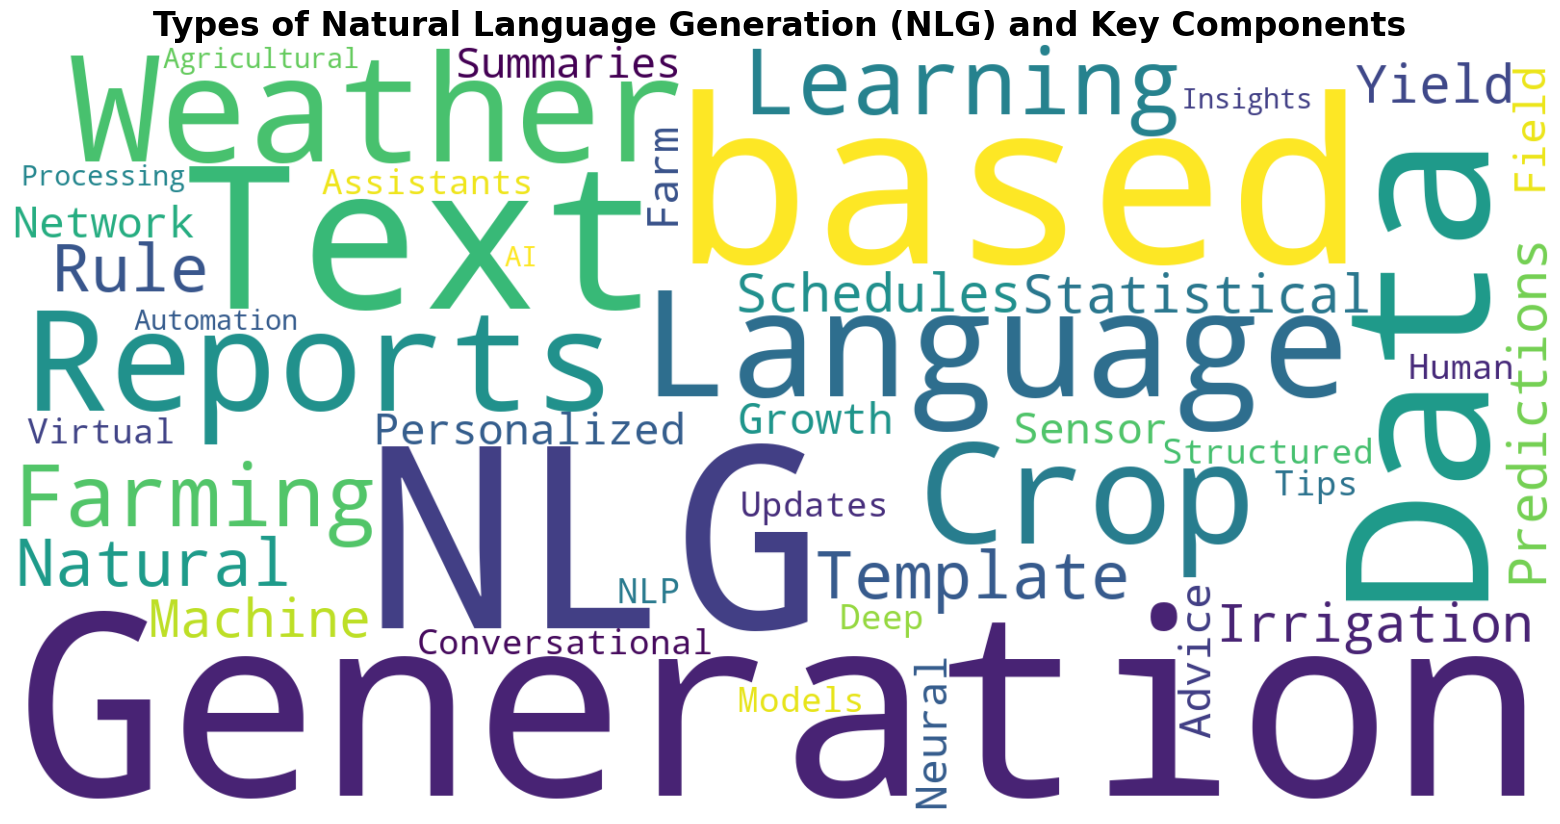

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Text data highlighting all NLG types and key components
text = """
Natural Language Generation (NLG) Template-based Generation Weather Reports Rule-based Generation Irrigation Schedules 
Statistical NLG Crop Yield Predictions Machine Learning-based NLG Personalized Farming Advice 
Neural Network-based NLG Farm Reports Field Sensor Data Data-to-Text Generation Crop Growth Summaries 
Conversational NLG Virtual Assistants Farming Tips Weather Updates NLP Structured Data Deep Learning Models
Text Generation Human-like Text Agricultural Insights Automation AI Language Processing
"""

# Generate the word cloud
wordcloud = WordCloud(
    width=1600, 
    height=800, 
    background_color='white', 
    colormap='viridis', 
    max_words=100, 
    contour_color='black', 
    contour_width=2,
    prefer_horizontal=0.9,
    font_path=None  # You can specify a custom font path for a unique look
).generate(text)

# Display the word cloud
plt.figure(figsize=(20, 10))  # High resolution
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Types of Natural Language Generation (NLG) and Key Components', fontsize=24, weight='bold')
plt.show()


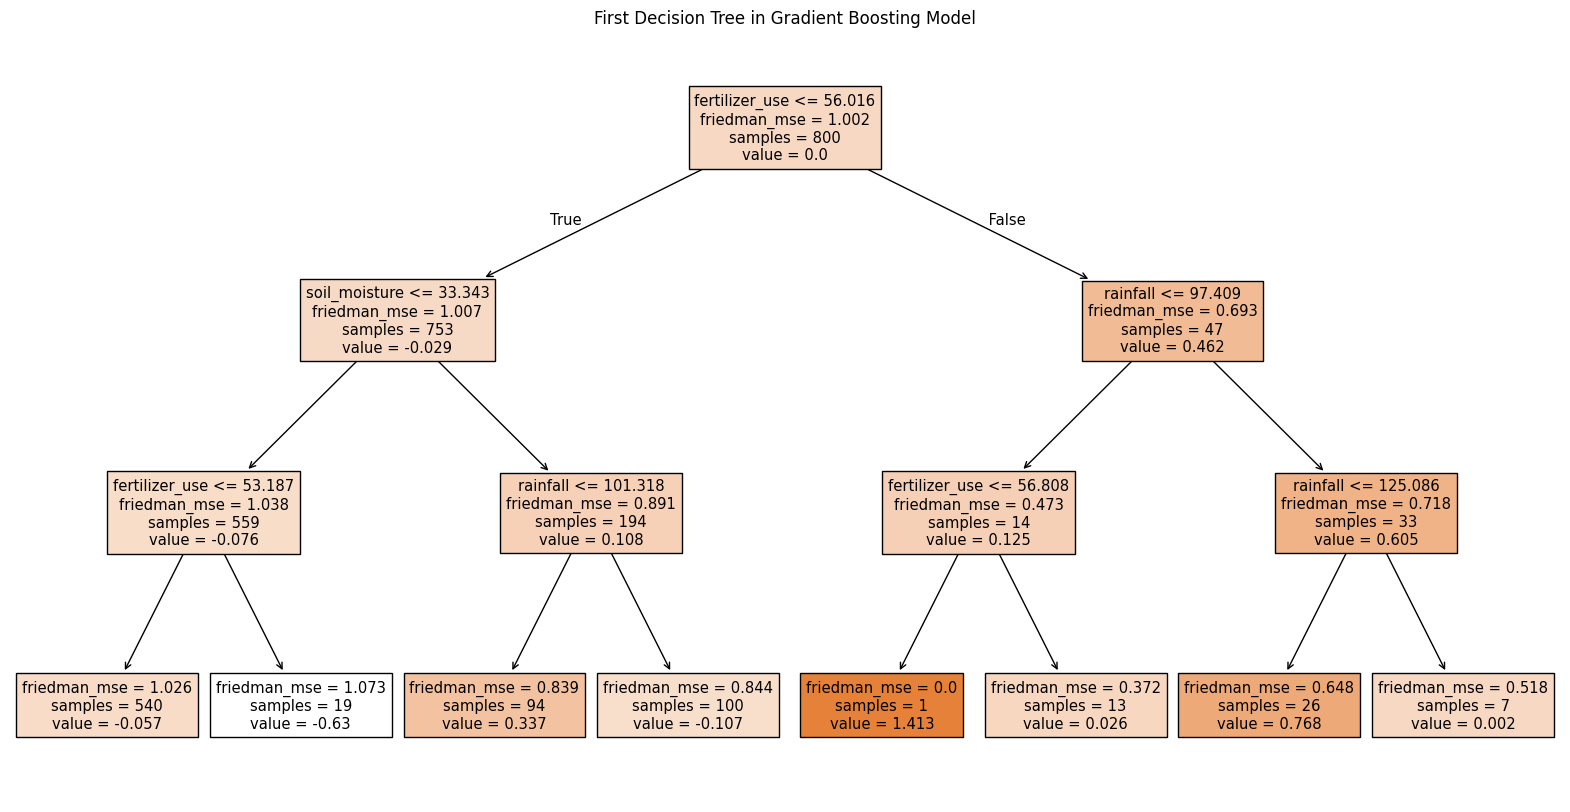

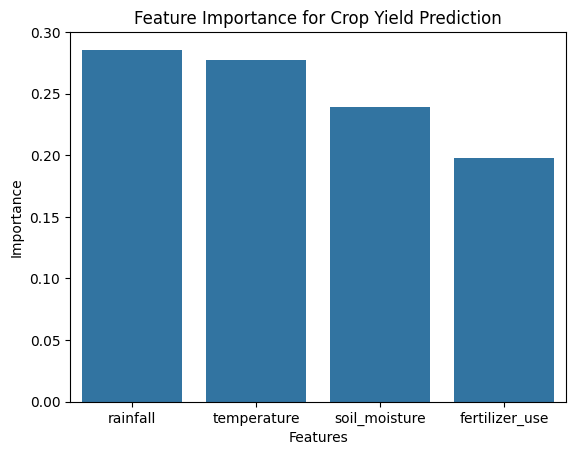

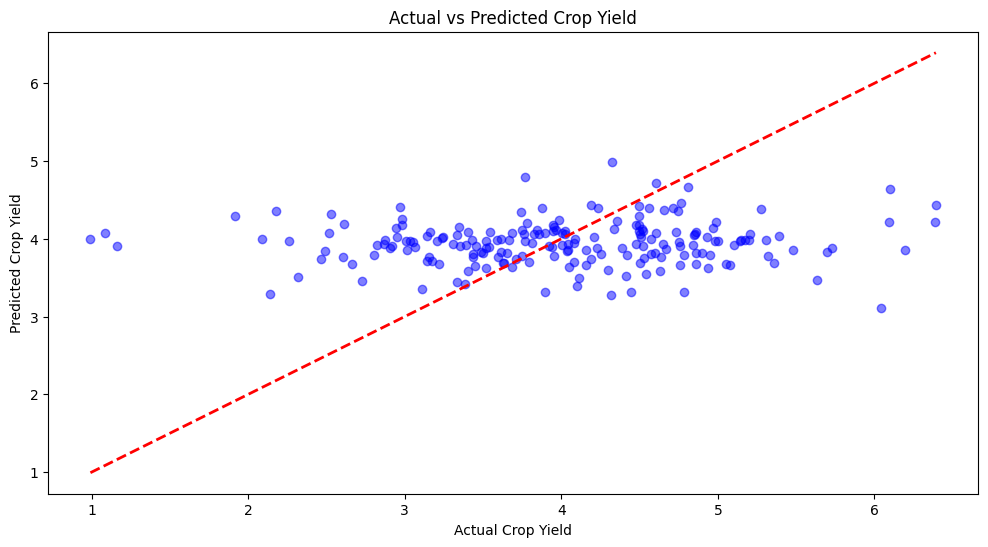

Mean Squared Error: 0.96


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import plot_tree
from sklearn import datasets
from sklearn.metrics import mean_squared_error

# Load sample plant data (or you can use your own plant-related dataset)
# Here we simulate some plant-related data (e.g., soil moisture, temperature, rainfall)
np.random.seed(42)
data = {
    'rainfall': np.random.normal(100, 20, 1000),        # mm
    'temperature': np.random.normal(28, 5, 1000),       # °C
    'soil_moisture': np.random.normal(30, 5, 1000),     # %
    'fertilizer_use': np.random.normal(40, 10, 1000),   # kg/ha
    'crop_yield': np.random.normal(4, 1, 1000)          # tons/ha
}

df = pd.DataFrame(data)

# Split the data into features and target
X = df.drop('crop_yield', axis=1)  # Features (predictors)
y = df['crop_yield']               # Target (crop yield)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, max_depth=3)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Visualize the first decision tree of the Gradient Boosting Model
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0, 0], filled=True, feature_names=X.columns)
plt.title("First Decision Tree in Gradient Boosting Model")
plt.show()

# Visualize feature importance using bar chart
feature_importances = model.feature_importances_
sns.barplot(x=X.columns, y=feature_importances)
plt.title("Feature Importance for Crop Yield Prediction")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Plot the predictions vs. actual values for crop yield
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', lw=2)
plt.title('Actual vs Predicted Crop Yield')
plt.xlabel('Actual Crop Yield')
plt.ylabel('Predicted Crop Yield')
plt.show()

# Calculate and print the model performance (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


DataFrame Shape:  (1000, 5)

DataFrame Description:
           rainfall  temperature  soil_moisture  fertilizer_use   crop_yield
count  1000.000000  1000.000000    1000.000000     1000.000000  1000.000000
mean    100.386641    28.354181      30.029171       39.812808     3.950726
std      19.584319     4.987272       4.917271       10.271325     0.992380
min      35.174653    13.298057      14.902439       10.705513     0.823296
25%      87.048194    24.968792      26.760002       32.625795     3.317395
50%     100.506012    28.315386      29.998746       40.001846     3.981758
75%     112.958878    31.644411      33.304577       46.669454     4.639123
max     177.054630    43.965538      49.631189       72.430930     7.112910


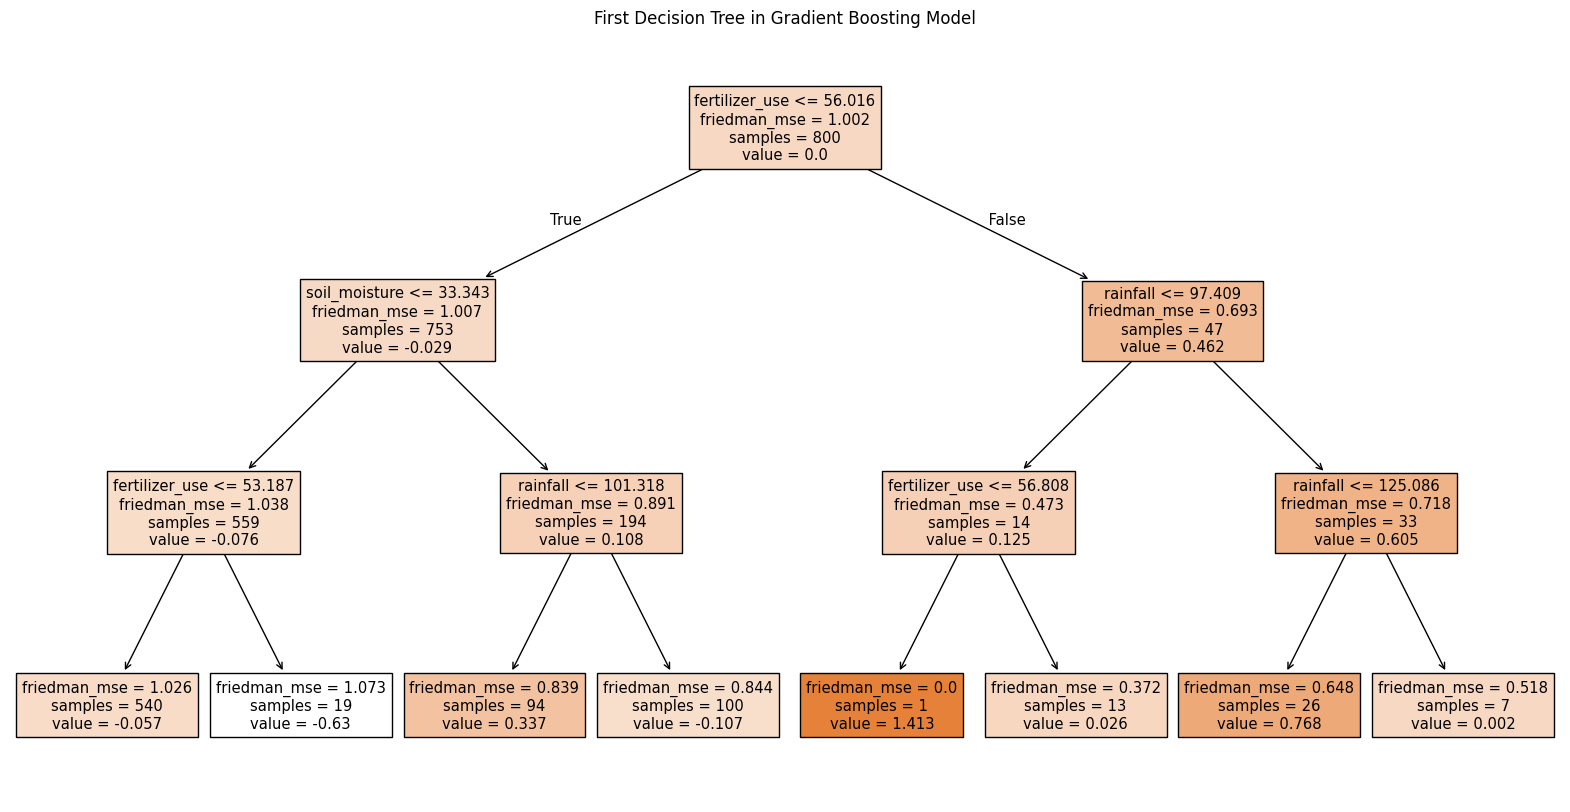

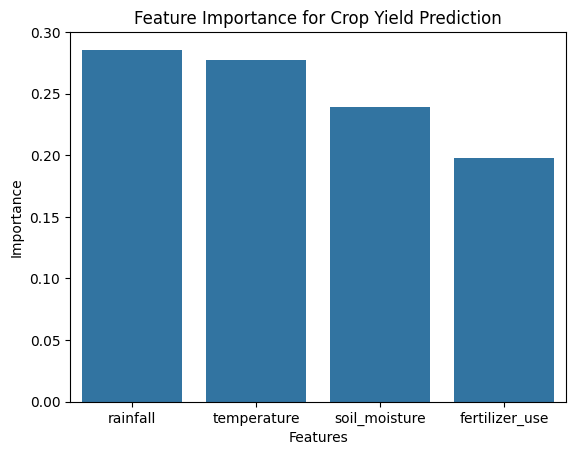

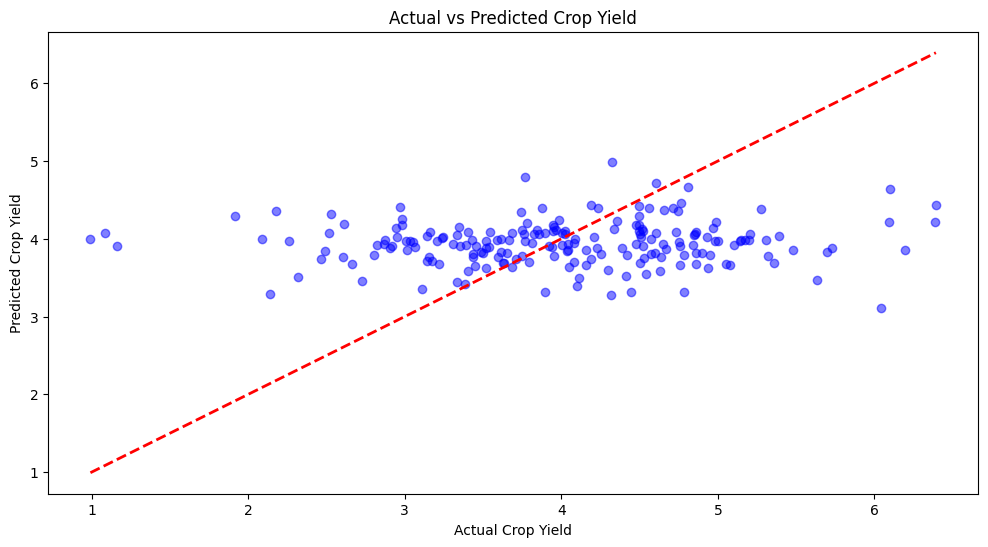

Mean Squared Error: 0.96


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error

# Set the random seed for reproducibility
np.random.seed(42)

# Generate synthetic plant-related data
data = {
    'rainfall': np.random.normal(100, 20, 1000),        # mm
    'temperature': np.random.normal(28, 5, 1000),       # °C
    'soil_moisture': np.random.normal(30, 5, 1000),     # %
    'fertilizer_use': np.random.normal(40, 10, 1000),   # kg/ha
    'crop_yield': np.random.normal(4, 1, 1000)          # tons/ha
}

# Load the data into a DataFrame
df = pd.DataFrame(data)

# Print the shape of the DataFrame
print("DataFrame Shape: ", df.shape)

# Print the summary statistics of the DataFrame
print("\nDataFrame Description:\n", df.describe())

# Split the data into features (X) and target (y)
X = df.drop('crop_yield', axis=1)  # Predictors
y = df['crop_yield']               # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, max_depth=3)
model.fit(X_train, y_train)

# Predict crop yield on the test data
y_pred = model.predict(X_test)

# Visualize the first decision tree in the Gradient Boosting model
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0, 0], filled=True, feature_names=X.columns)
plt.title("First Decision Tree in Gradient Boosting Model")
plt.show()

# Visualize the feature importance using a bar plot
feature_importances = model.feature_importances_
sns.barplot(x=X.columns, y=feature_importances)
plt.title("Feature Importance for Crop Yield Prediction")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Plot Actual vs Predicted values for crop yield
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', lw=2)
plt.title('Actual vs Predicted Crop Yield')
plt.xlabel('Actual Crop Yield')
plt.ylabel('Predicted Crop Yield')
plt.show()

# Calculate and display the Mean Squared Error (MSE) to evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Interpretations
# 1. DataFrame Shape: 
# The dataset contains 1000 samples and 5 variables (4 features + 1 target).

# 2. DataFrame Description: 
# The summary shows the mean, standard deviation, min, max, and percentiles for each feature and the target.

# 3. First Decision Tree Visualization:
# The first decision tree visualizes how the model splits the data based on features to predict crop yield.

# 4. Feature Importance:
# The bar plot shows which features have the most impact on predicting crop yield. Higher bars indicate greater importance.

# 5. Actual vs Predicted Values Plot:
# The scatter plot compares actual crop yield values with predicted values. The closer the points are to the red line, the better the model's predictions.

# 6. Mean Squared Error (MSE):
# The MSE quantifies the average squared difference between actual and predicted values. A lower MSE indicates better model performance.


DataFrame Shape:  (1000, 5)

DataFrame Description:
           rainfall  temperature  soil_moisture  fertilizer_use   crop_yield
count  1000.000000  1000.000000    1000.000000     1000.000000  1000.000000
mean    100.386641    28.354181      30.029171       39.812808     3.950726
std      19.584319     4.987272       4.917271       10.271325     0.992380
min      35.174653    13.298057      14.902439       10.705513     0.823296
25%      87.048194    24.968792      26.760002       32.625795     3.317395
50%     100.506012    28.315386      29.998746       40.001846     3.981758
75%     112.958878    31.644411      33.304577       46.669454     4.639123
max     177.054630    43.965538      49.631189       72.430930     7.112910


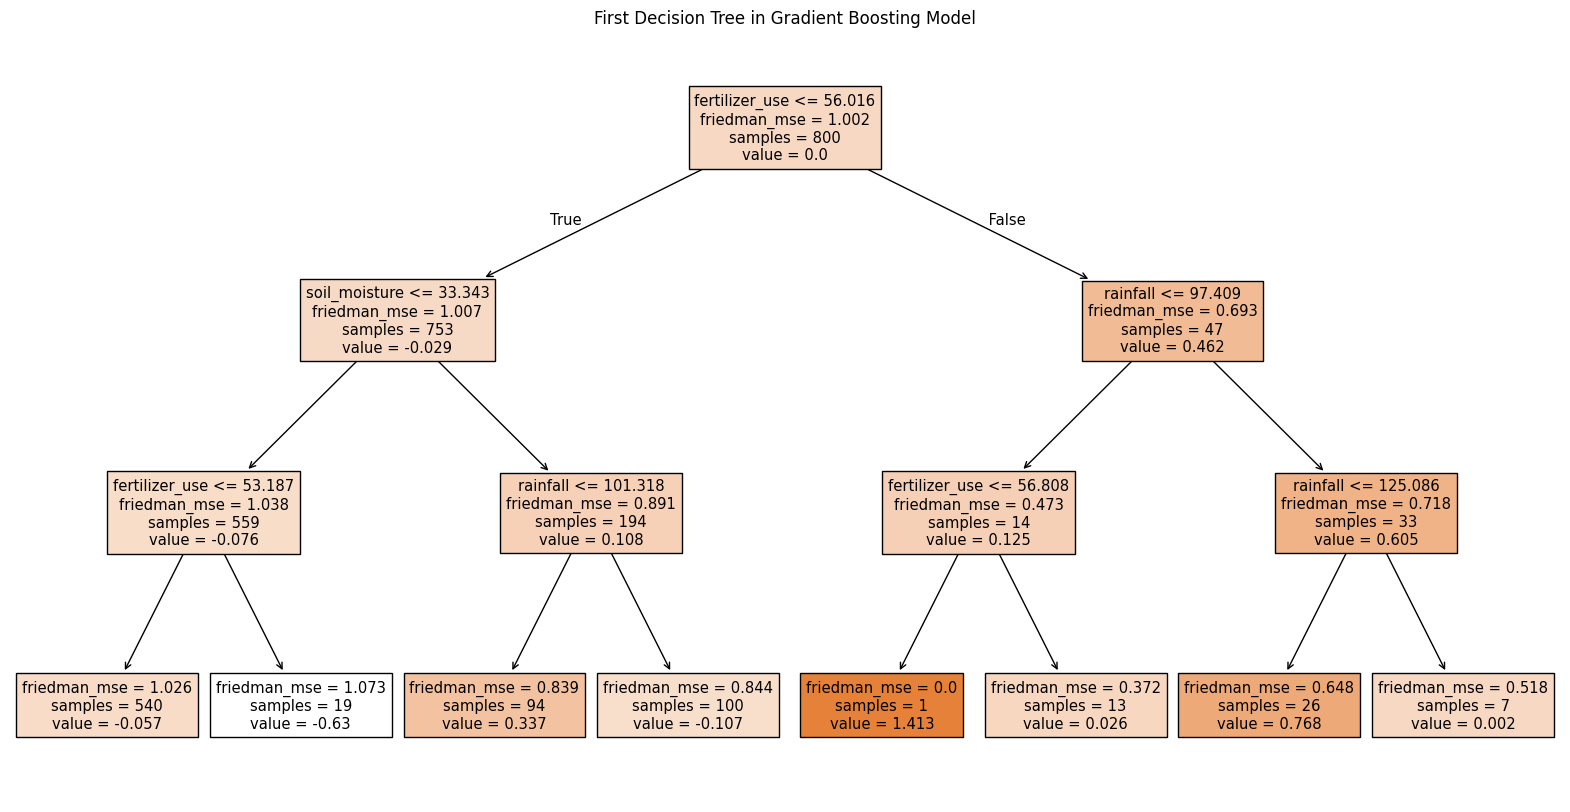

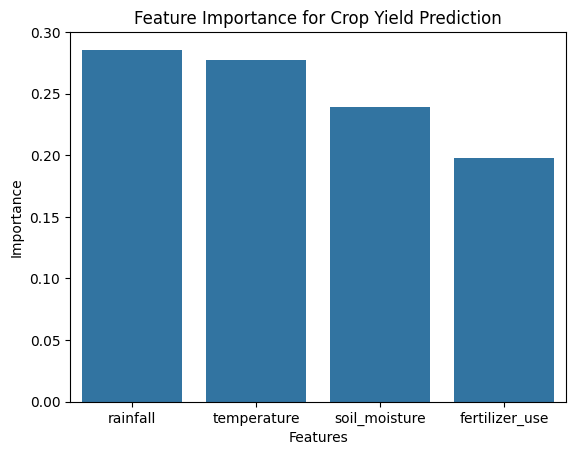

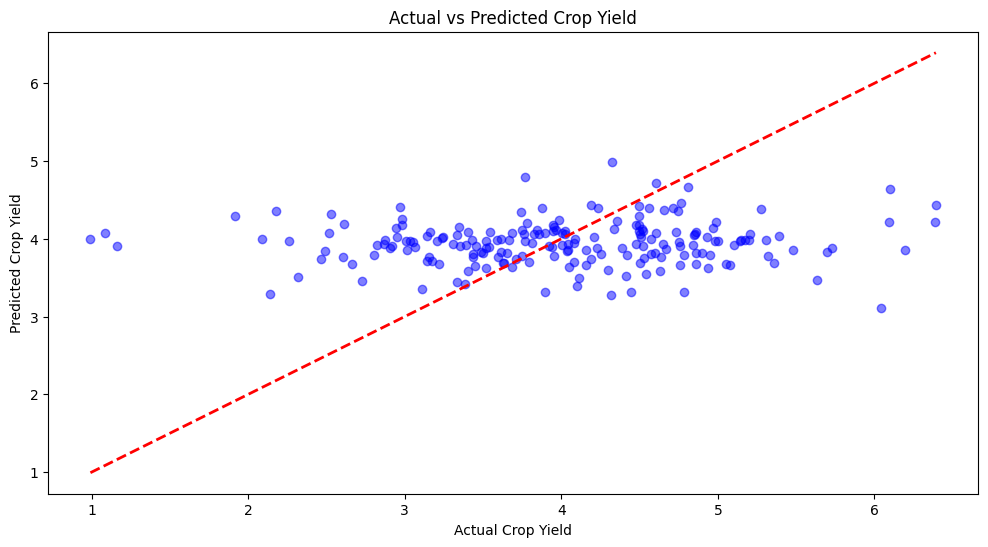

Mean Squared Error: 0.96

Interpretation: The dataset has 1000 samples and 5 features (4 predictors and 1 target).

Interpretation: The dataset's summary statistics show that the average rainfall is 100.39 mm, average temperature is 28.35 °C, and the mean crop yield is 3.95 tons/ha.

Interpretation: The first decision tree represents the initial split based on the most significant features for predicting crop yield. The nodes demonstrate how features such as 'temperature' and 'rainfall' are used to make decisions.

Interpretation: The feature 'rainfall' has an importance score of 0.29. This suggests that it plays a key role in predicting crop yield.

Interpretation: The feature 'temperature' has an importance score of 0.28. This suggests that it plays a key role in predicting crop yield.

Interpretation: The feature 'soil_moisture' has an importance score of 0.24. This suggests that it plays a key role in predicting crop yield.

Interpretation: The feature 'fertilizer_use' has an impor

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error

# Set the random seed for reproducibility
np.random.seed(42)

# Generate synthetic plant-related data
data = {
    'rainfall': np.random.normal(100, 20, 1000),        # mm
    'temperature': np.random.normal(28, 5, 1000),       # °C
    'soil_moisture': np.random.normal(30, 5, 1000),     # %
    'fertilizer_use': np.random.normal(40, 10, 1000),   # kg/ha
    'crop_yield': np.random.normal(4, 1, 1000)          # tons/ha
}

# Load the data into a DataFrame
df = pd.DataFrame(data)

# Print the shape of the DataFrame
df_shape = df.shape
print("DataFrame Shape: ", df_shape)

# Print the summary statistics of the DataFrame
df_description = df.describe()
print("\nDataFrame Description:\n", df_description)

# Split the data into features (X) and target (y)
X = df.drop('crop_yield', axis=1)  # Predictors
y = df['crop_yield']               # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, max_depth=3)
model.fit(X_train, y_train)

# Predict crop yield on the test data
y_pred = model.predict(X_test)

# Visualize the first decision tree in the Gradient Boosting model
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0, 0], filled=True, feature_names=X.columns)
plt.title("First Decision Tree in Gradient Boosting Model")
plt.show()

# Visualize the feature importance using a bar plot
feature_importances = model.feature_importances_
sns.barplot(x=X.columns, y=feature_importances)
plt.title("Feature Importance for Crop Yield Prediction")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Plot Actual vs Predicted values for crop yield
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', lw=2)
plt.title('Actual vs Predicted Crop Yield')
plt.xlabel('Actual Crop Yield')
plt.ylabel('Predicted Crop Yield')
plt.show()

# Calculate and display the Mean Squared Error (MSE) to evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Dynamic Interpretation

# 1. DataFrame Shape Interpretation
print("\nInterpretation: The dataset has", df_shape[0], "samples and", df_shape[1], "features (4 predictors and 1 target).")

# 2. DataFrame Description Interpretation
print("\nInterpretation: The dataset's summary statistics show that the average rainfall is", round(df_description['rainfall']['mean'], 2),
      "mm, average temperature is", round(df_description['temperature']['mean'], 2), "°C, and the mean crop yield is",
      round(df_description['crop_yield']['mean'], 2), "tons/ha.")

# 3. Decision Tree Visualization Interpretation
print("\nInterpretation: The first decision tree represents the initial split based on the most significant features for predicting crop yield. The nodes demonstrate how features such as 'temperature' and 'rainfall' are used to make decisions.")

# 4. Feature Importance Interpretation
for feature, importance in zip(X.columns, feature_importances):
    print(f"\nInterpretation: The feature '{feature}' has an importance score of {importance:.2f}. This suggests that it plays a key role in predicting crop yield.")

# 5. Actual vs Predicted Values Interpretation
print("\nInterpretation: The scatter plot shows how closely the predicted crop yield (y_pred) aligns with the actual crop yield (y_test). The points closer to the red line indicate more accurate predictions by the model.")

# 6. Mean Squared Error Interpretation
print(f"\nInterpretation: The model's Mean Squared Error (MSE) is {mse:.2f}. A lower MSE indicates that the model's predictions are closer to the actual values, suggesting a better performance.")

